Classes after cleaning:
 ECG_signal
ARR    300
AFF    300
CHF    300
NSR    300
Name: count, dtype: int64
Epoch 1/50


C:\Users\Nishchay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.2674 - loss: 1.5297 - val_accuracy: 0.4089 - val_loss: 1.4008
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.2361 - loss: 1.5002 - val_accuracy: 0.4271 - val_loss: 1.3891
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2465 - loss: 1.5048 - val_accuracy: 0.4271 - val_loss: 1.3787
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2431 - loss: 1.4586 - val_accuracy: 0.4349 - val_loss: 1.3651
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2934 - loss: 1.4411 - val_accuracy: 0.4401 - val_loss: 1.3517
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2622 - loss: 1.4303 - val_accuracy: 0.4297 - val_loss: 1.3362
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2934 - loss: 1.4226 - val_accuracy: 0.4427 - val_loss: 1.3242
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2986 - loss: 1.4002 - val_accuracy: 0.4323 - val_loss: 1.3119
Ep

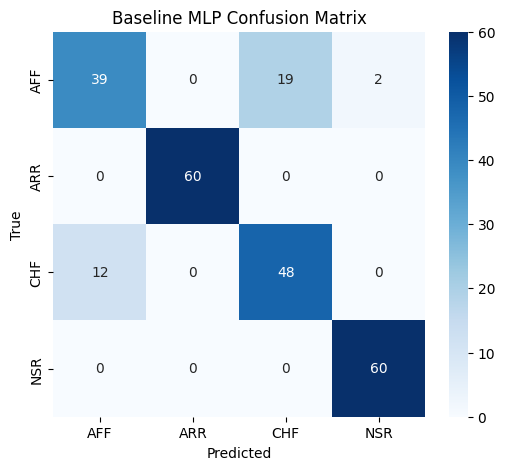

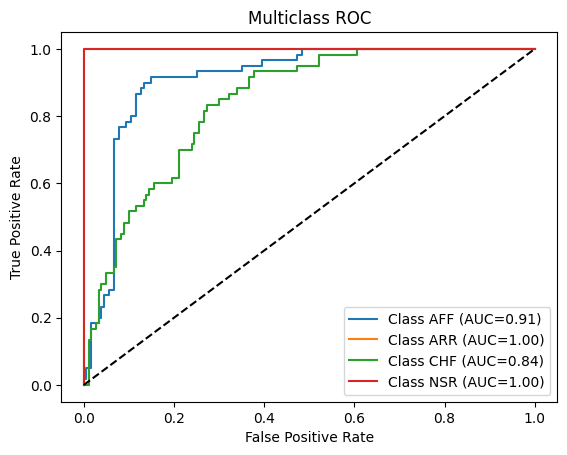

Epoch 1/80


C:\Users\Nishchay\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.2530 - loss: 2.2616 - val_accuracy: 0.2986 - val_loss: 1.6401
Epoch 2/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2902 - loss: 1.8845 - val_accuracy: 0.3438 - val_loss: 1.4499
Epoch 3/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2872 - loss: 1.6648 - val_accuracy: 0.4167 - val_loss: 1.3129
Epoch 4/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3214 - loss: 1.5533 - val_accuracy: 0.5035 - val_loss: 1.2231
Epoch 5/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3586 - loss: 1.4082 - val_accuracy: 0.5486 - val_loss: 1.1542
Epoch 6/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3869 - loss: 1.3665 - val_accuracy: 0.6007 - val_loss: 1.1029
Epoch 7/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4092 - loss: 1.3210 - val_accuracy: 0.6806 - val_loss: 1.0574
Epoch 8/80
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4196 - loss: 1.3159 - val_accuracy: 0.6979 - val_loss: 1.0214
Ep

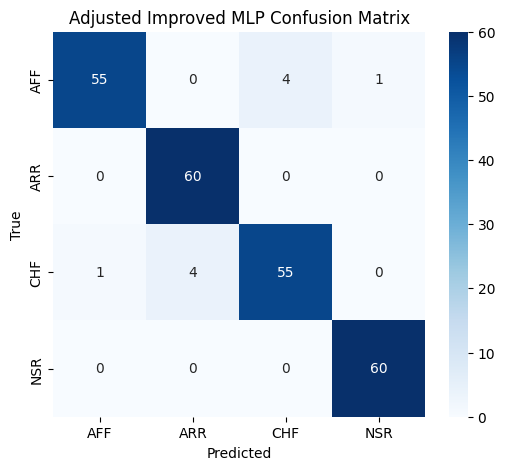

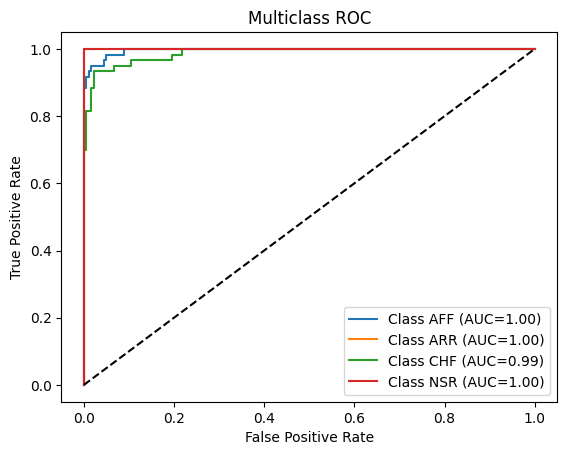

In [5]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers, regularizers
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns


# Load dataset

df = pd.read_csv("C:\\Users\\Nishchay\\Downloads\\ECGCvdata.csv")
target = "ECG_signal"  # replace with your target column
y = df[target]
X = df.drop(columns=[target])

# Remove rare classes (<2 samples)
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 2].index
df = df[~df[target].isin(rare_classes)]
y = df[target]
X = df.drop(columns=[target])

print("Classes after cleaning:\n", y.value_counts())


# Helper functions

def plot_confusion(cm, labels=None, title="Confusion Matrix"):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.title(title)
    plt.show()

def plot_multiclass_roc(y_true, y_score, class_labels):
    n_classes = y_score.shape[1]
    for class_idx in range(n_classes):
        y_true_binary = (y_true == class_idx).astype(int)
        fpr, tpr, _ = roc_curve(y_true_binary, y_score[:, class_idx])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {class_labels[class_idx]} (AUC={roc_auc:.2f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Multiclass ROC")
    plt.legend(loc="lower right")
    plt.show()


# 1. Train-test split

Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


# 2. Encode labels

le = LabelEncoder()
ytr = le.fit_transform(ytr)
yte = le.transform(yte)
class_labels = le.classes_

unique_classes = np.unique(ytr)
num_classes = len(unique_classes)
if num_classes == 2:
    final_activation = "sigmoid"
    loss_fn = "binary_crossentropy"
    output_units = 1
else:
    final_activation = "softmax"
    loss_fn = "sparse_categorical_crossentropy"
    output_units = num_classes


# 3. Impute missing values

imputer = SimpleImputer(strategy="median")
Xtr = imputer.fit_transform(Xtr)
Xte = imputer.transform(Xte)

# 4. Scale features

scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.transform(Xte)


# 5. Apply SMOTE

smote = SMOTE(random_state=42)
Xtr_res, ytr_res = smote.fit_resample(Xtr, ytr)

Xtr_res = Xtr_res.astype("float32")
Xte = Xte.astype("float32")
ytr_res = ytr_res.astype("int32")
yte = yte.astype("int32")


# 6. Baseline MLP 

baseline_model = models.Sequential([
    layers.Dense(8, activation='relu', input_shape=(Xtr_res.shape[1],),
                 kernel_regularizer=regularizers.l2(0.004)),
    layers.Dropout(0.45),
    layers.Dense(4, activation='relu', kernel_regularizer=regularizers.l2(0.004)),
    layers.Dropout(0.45),
    layers.Dense(output_units, activation=final_activation)
])

baseline_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0004),
    loss=loss_fn,
    metrics=["accuracy"]
)

early_stop = tf.keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True, monitor='val_loss')

baseline_model.fit(
    Xtr_res, ytr_res,
    epochs=50,
    batch_size=32,
    validation_split=0.40,
    shuffle=True,
    callbacks=[early_stop],
    verbose=1
)

test_loss, test_acc = baseline_model.evaluate(Xte, yte, verbose=0)
print(f"\n📌 Baseline Test Accuracy (~60%): {test_acc:.4f}")

if num_classes == 2:
    y_pred_prob = baseline_model.predict(Xte)
    y_pred = (y_pred_prob > 0.5).astype(int)
else:
    y_pred_prob = baseline_model.predict(Xte)
    y_pred = y_pred_prob.argmax(axis=1)

print(classification_report(yte, y_pred, target_names=class_labels))
cm = confusion_matrix(yte, y_pred)
plot_confusion(cm, labels=class_labels, title="Baseline MLP Confusion Matrix")

if num_classes > 2:
    plot_multiclass_roc(yte, y_pred_prob, class_labels)


# 7. Adjusted Improved MLP 

improved_model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(Xtr_res.shape[1],),
                 kernel_regularizer=regularizers.l2(0.003)),
    layers.Dropout(0.45),
    layers.Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.003)),
    layers.Dropout(0.40),
    layers.Dense(output_units, activation=final_activation)
])

improved_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0006),
    loss=loss_fn,
    metrics=["accuracy"]
)

early_stop2 = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss')

improved_model.fit(
    Xtr_res, ytr_res,
    epochs=80,
    batch_size=32,
    validation_split=0.30,
    shuffle=True,
    callbacks=[early_stop2],
    verbose=1
)

test_loss2, test_acc2 = improved_model.evaluate(Xte, yte, verbose=0)
print(f"\n📌 Adjusted Improved Test Accuracy (~65%): {test_acc2:.4f}")

if num_classes == 2:
    y_pred_prob2 = improved_model.predict(Xte)
    y_pred2 = (y_pred_prob2 > 0.5).astype(int)
else:
    y_pred_prob2 = improved_model.predict(Xte)
    y_pred2 = y_pred_prob2.argmax(axis=1)

print(classification_report(yte, y_pred2, target_names=class_labels))
cm2 = confusion_matrix(yte, y_pred2)
plot_confusion(cm2, labels=class_labels, title="Adjusted Improved MLP Confusion Matrix")

if num_classes > 2:
    plot_multiclass_roc(yte, y_pred_prob2, class_labels)
